<a href="https://colab.research.google.com/github/seohyeon-lee-2025/data-science-study-notes/blob/main/annotated_pai_workshop_4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P-ai AI/ML Workshop: Session 4b

Welcome to P-ai's third session of the AI/ML workshop series! Today we'll learn about
- Deep learning
    - How to build and train a neural net with Tensorflow and Keras
    - Types of neural nets
- Solving a real-world classification problem with a neural net

<img src="https://images.squarespace-cdn.com/content/5d5aca05ce74150001a5af3e/1580018583262-NKE94RECI46GRULKS152/Screen+Shot+2019-12-05+at+11.18.53+AM.png?content-type=image%2Fpng" width="200px">

## Implementation: Intro to Tensorflow and Keras

<img src="https://3.bp.blogspot.com/-QZVBl08fmPk/XhO909Ha1dI/AAAAAAAACZI/q1a1UykGKe0KDUZ_ZITtWmM7bBJFRrvPQCLcBGAsYHQ/s1600/tensorflowkeras.jpg" width="500px">

You might be wondering how to actually build and train a neural net. The most popular frameworks for deep learning are Google's [Tensorflow](https://www.tensorflow.org/) and Facebook's [Pytorch](https://pytorch.org/). Under the hood, it's basically a bunch of optimized graph algorithms that are necessary for neural networks.

While you can build a neural net with Tensorflow alone (and in the future, you might need to do this to create a more "customized" neural net), this can often be a bit more involved than it has to be for a beginner. Luckily, Google also developed [Keras](https://keras.io/), which is an API for Tensorflow; in other words, it lets you write more readable and intuitive code, and Keras takes care of the nitty-gritty Tensorflow-y details.

Let's take a look at how we would build the hypothetical neural net above with Keras.

In [1]:
''' Imports; this might take a second to load '''
import tensorflow
# Import layers we need (in this case, just Dense)
from tensorflow.keras.layers import Dense
# Sequential model means you just add layers in a sequence
from tensorflow.keras.models import Sequential
# Adam optimizer
from tensorflow.keras.optimizers import Adam

In [7]:
''' Build model '''
model = Sequential()                                   # Define sequential model
model.add(Dense(256, input_dim=26))                    # Input layer and first hidden layer
model.add(Dense(256))                                  # Second hidden layer
model.add(Dense(3, activation='softmax'))              # Output layer; note activation function

In [8]:
''' Choose optimizer and loss function '''
opt = Adam(learning_rate=0.001)              # Set learning rate to 0.001
loss = 'categorical_crossentropy'            # Using categorical crossentropy for multiclass classification
#similar to mean squared error but is designed to compute loss in categorical variable: 

In [9]:
''' Compile model and print layer summary '''
model.compile(optimizer=opt, 
    loss=loss,
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               6912      
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 73,475
Trainable params: 73,475
Non-trainable params: 0
_________________________________________________________________


And that's that! Now, let's imagine we have some data:

In [10]:
import random
import numpy as np

# Generate enough random numbers
random_numbers = np.random.rand(1000 * 26)
# This represents 1,000 examples, each with 26 features (frequencies a-z)
X = np.reshape(random_numbers, (1000, 26))
# This represents 1,000 one-hot vectors (which language the corresponding x actually is)
#[1 0 0] = English, [0 1 0] = German, [0 0 1] = Spanish. any encoding works as far as it's consistent
y = np.zeros((1000, 3), dtype=int)
for i in range(len(y)):
    y[i][random.randint(0, 2)] = 1

In [20]:
print("Fake dataset:")
print("X shape: ", X.shape)
print("First X:", X[41]) #first x = first sentence in fake dataset
print("y shape: ", y.shape)
print("First y:", y[41]) #first y = language prediction of first sentence in fake dataset

Fake dataset:
X shape:  (1000, 26)
First X: [0.34319903 0.49121732 0.72579511 0.16865349 0.70948753 0.62319231
 0.46342627 0.28914236 0.38879883 0.69882941 0.85042638 0.80007229
 0.01328287 0.62910409 0.9328113  0.08590973 0.58870019 0.33227842
 0.27513336 0.35857679 0.7830047  0.22132634 0.76181104 0.49817175
 0.5913944  0.88381626]
y shape:  (1000, 3)
First y: [1 0 0]


Now, we can fit our model to this fake data.

In [29]:
from sklearn.model_selection import train_test_split
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("X_test",X_test.shape)
print("X_train",X_train.shape)
print("y_test",y_test.shape)
print("y_train",y_train.shape)
# Here we can specify the number of epochs to train on, the batch size, and much more
# Check out the documentation for more!
history = model.fit(X_train, y_train, epochs=10, batch_size=32) 
#model.fit runs the actual calculations
#epoch: how many times to iterate over this, batchsize: we are looking at 32 random inputs before updating the model's internal parameter
#low accuracy because dataset is nonsensical and model cannot find a meaningful mapping from X to y
#but still better than random guessing (1/3 chance since we have 3 options). it means the model is overfitting. 
#better-than-expected model performance doesn't necessarily mean overfitting
#accuracy from train set!

X_test (250, 26)
X_train (750, 26)
y_test (250, 3)
y_train (750, 3)
Epoch 1/10
24/24 [==============================] - 0s 6ms/step - loss: 1.0819 - accuracy: 0.4000
Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 1.0823 - accuracy: 0.4107
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 1.0734 - accuracy: 0.4067
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 1.0717 - accuracy: 0.4053
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 1.0705 - accuracy: 0.4053
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 1.0748 - accuracy: 0.3947
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 1.0742 - accuracy: 0.4067
Epoch 8/10
24/24 [==============================] - 0s 3ms/step - loss: 1.0750 - accuracy: 0.4093
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: 1.0720 - accuracy: 0.4187
Epoch 10/10
24/24 [==============================]

Cool! We see a lot of stuff being output, and it might seem like a lot; here's the breakdown:

<img src="tf_output.png" width="700px">

Notice how, as the model trained on the training data for more epochs, the loss decreased and the accuracy increased. This is to be expected; the more times the model sees the data, the more it can fit to that data. You should probably be concerned about something, though...

Since the data is random, the model should have not much more than a 33% accuracy. Yet, we see at the end of 10 epochs, the model's accuracy is above 40%. How can this be? Did the model discover some hidden patterns in the apparently random data?

No. This is the classic problem of **overfitting**. 

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png" width="600px">

Virtually every machine learning model has the tendency to overfit on its training data; that is, it begins to learn the *specifics* of the data instead of the *general trend*. This isn't good, because that means your model is **unstable**, which means (among other things) it *won't generalize well*. This is why we have training and test sets; we test our model on data it's never seen before to test whether it can actually generalize what it's learned, or if it overfit.

In [34]:
# Test our model on the test dataset
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1.1610 - accuracy: 0.3120


[1.1609575748443604, 0.31200000643730164]

The result of `evaluate` is a list of the final loss and accuracy (or whatever metric we compiled the model with). We can see that the model is actually only right ~33% of the time on data it hasn't seen before, which is exactly what we would expect. That means that our model did overfit on the training data a bit, as we would expect would happen with random data.

**Helpful tip**: When calling `.fit()`, you can also pass in a validation split, which splits your training data *again* into training and validation data, and Tensorflow will test your model on the validation data after each epoch.

In [32]:
def buildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=26))
    model.add(Dense(256))
    model.add(Dense(3, activation='softmax'))
    opt = Adam(learning_rate=0.001)
    loss = 'categorical_crossentropy'
    model.compile(optimizer=opt, 
        loss=loss,
        metrics=['accuracy'])
    return model

In [35]:
model = buildModel()
# Use 20% of the data for validation
#accuracy: (measured on test set) = # of correct predictions by model / # of output
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
#tested on test set, not training set. -> accuracy went down near random guessing
#validation accuracy (data obtained from outside train set) stops decreasing at some point. overfitting happens beyond this point. 

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 1.1709 - accuracy: 0.3050 - val_loss: 1.1194 - val_accuracy: 0.3467
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.1014 - accuracy: 0.3650 - val_loss: 1.1628 - val_accuracy: 0.3200
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 1.1079 - accuracy: 0.3583 - val_loss: 1.1137 - val_accuracy: 0.3267
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 1.0851 - accuracy: 0.3950 - val_loss: 1.1529 - val_accuracy: 0.3067
Epoch 5/5
19/19 [==============================] - 0s 5ms/step - loss: 1.0926 - accuracy: 0.3950 - val_loss: 1.1414 - val_accuracy: 0.3600


We can now see the validation loss and accuracy after each epoch and, as we would expect, the validation loss / accuracy don't get any better the more we train.

Before moving onto other types of neural nets and an example, we can quickly see how easy it is to make predictions with our neural net.

In [ ]:
# Dummy data; shape: (1, 26)
# That is, one example with 26 features
dataToClassify = np.reshape(np.random.rand(26), (1,26))
pred = model.predict(dataToClassify)
# Print prediction of first (only) example
print(pred[0])

[0.34128395 0.42128998 0.23742607]


Remember that, for multiclass classification, the output of the model is a vector of probabilities for each class. To get a single class, we can easily find the index with the highest probability.

In [ ]:
print(np.argmax(pred[0]))

1


Image processing:


*   all images must have same dimensions and framesize
*   convert images into pixels

Language:


*   word embedding




So, our model predicts that this hypothetical input (which we imagine is a vector of letter frequencies) belongs to language 0 (say, English).

Pat yourself on the back, that's the basics of building a neural net!

## 2. Other neural nets!

There are many "flavors" of neural networks. Here are some of the most common:

### Multilayer Perceptron (MLP) aka "Vanilla" Neural Net
The neural nets we just looked at are MLPs, or the "vanilla" feed-forward neural net. Many times, people will refer to these "basic" neural nets as just "neural nets" because they're not specifying a more specific type. MLPs find a relationship between 1D input and 1D output. So, if you can encode both your inputs and outputs as vectors, chances are, all you need is an MLP.

### Convolutional Neural Network (CNN)
A CNN is a type of neural net that works best with input where the **location** of the values is important. Take our  vanilla neural net example; it doesn't matter which order we store the letter frequencies in our input vector so long as we stick with an order. We can't say the same for images; it may matter a lot *where* in an image some feature is. CNNs work by first **convolving** over the image, which would probably be a bit tangential to explain now, but you can read more about it [here](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/). In any case, convolution allows the CNN to learn features about the relative location of values in the matrix, which is perfect for image processing!

<img src="https://miro.medium.com/max/1400/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg" width="600px">

### Long Short Term Memory (LSTM)
The LSTM is a type of **RNN** (Recurrent Neural Network), which means it's meant to deal with **temporal** data. For example, if you were trying to predict something about a **sequence** of values, a regular neural network wouldn't do the trick. The LSTM introduces mechanisms for the net to "remember" old information and synthesize it with new information (hence the name). For a long time, LSTMs were the go-to for learning language, since you can represent a series of words numerically (see [word embeddings](https://machinelearningmastery.com/what-are-word-embeddings/)!).

<img src="https://miro.medium.com/max/1400/1*ahafyNt0Ph_J6Ed9_2hvdg.png" width="600px">

### Transformer

Transformers have really taken off in the past few years, especially with the enormous success of language models like BERT and GPT. Transformers build off of another type of model called the **encoder-decoder**, where the model learns both how to encode and decode data to get from input to output; the classic example is language translation. First, you encode a series of words in one language into a vector (the "meaning"), which is then decoded into a series of words in the second language. The transformer is basically an encoder-decoder on steroids; it has stacks of encoders and stacks of decoders, and it also implements this cool concept called [Attention](https://arxiv.org/abs/1706.03762), which helps the model learn *which* parts of the input correspond to which parts of the output. Transformers pretty much totally outperform LSTMs on translation tasks!

<img src="https://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png" width="600px">

### GAN

GAN stands for Generative Adversarial Network, and they were invented by machine learning celebrity [Ian Goodfellow](https://en.wikipedia.org/wiki/Ian_Goodfellow). The main idea of GANs is to have two components of the neural net; the *generator* and the *discriminator*, which "compete" with each other. The generator tries to generate data that is similar to the real data, and the discriminator tries to figure out which data are real and which were generated by the generator. Both "adversaries" get better throughout the training, and at some point, the generator may become so good, the discriminator can't tell which data is real and which is fake. At this point, thanks to the GAN, you have an impeccable generator and a classifier! There are lots of uses for GANs, from [generating images of people that don't exist](https://thispersondoesnotexist.com/) to [turning sketches into photorealistic images](https://arxiv.org/pdf/1801.02753.pdf).

<img src="https://i1.wp.com/bdtechtalks.com/wp-content/uploads/2018/05/GANs.png?resize=696%2C304&ssl=1" width="600px">

These are just a few of the most common "types" of models you'll hear about out there. There's no limit to the kinds of model you can put together, though. For example, if you need to learn spatio-temporal data, you can combine a CNN with an LSTM to get a CNN-LSTM. When you work with tensorflow directly, you can build your very own custom neural nets!

## 3. Case Study

To put our theory into practice, let's take a look at the [heart failure prediction dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). The goal of this task is to predict whether patients died from heart failure within a certain time frame after their last check-in. First, we should take a look at the data we have.

In [38]:
# Helpful imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [40]:
# Read and display data from file
heart_data = pd.read_csv('heart_failure.csv')
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


We see that we have 12 features and one prediction variable, `DEATH_EVENT`. Some of the variables are continuous (like `age`, `platelets`), and others are binary (e.g. `anaemia`, `diabetes`). 

In [41]:
CONTINUOUS_COLS = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
BINARY_COLS = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
TARGET_COL = 'DEATH_EVENT'

Let's plot all of our continuous variables against the target variable.

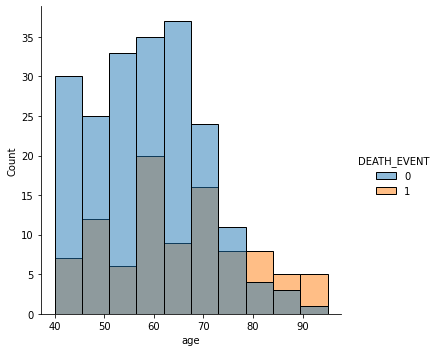

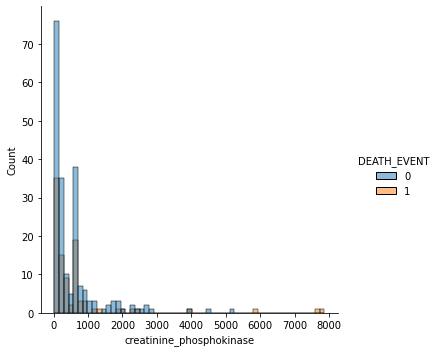

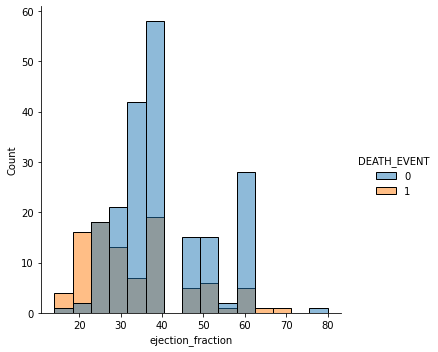

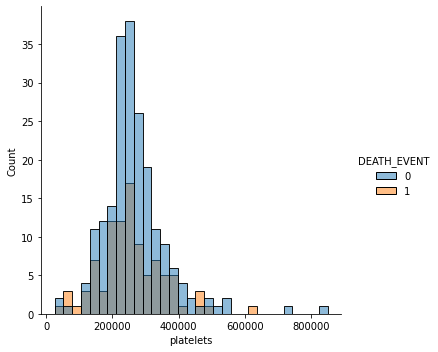

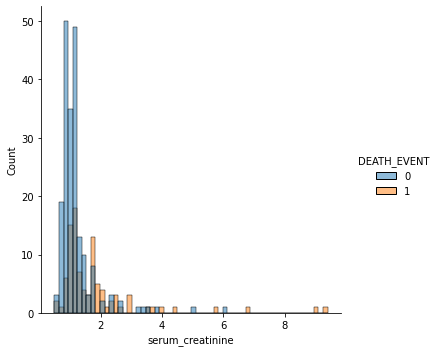

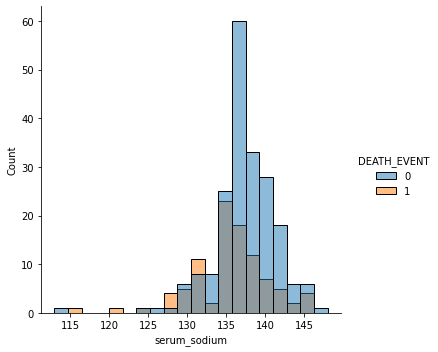

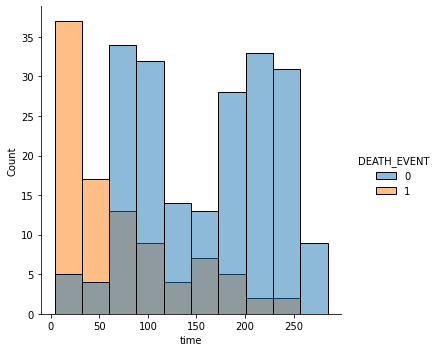

In [42]:
for col in CONTINUOUS_COLS:
    # Distribution plot
    sns.displot(heart_data, x=col, hue=TARGET_COL)
    #histograms with all columns with continuous variables
    #platelet -> not related
    plt.show()

We don't immediately see that any of these features would be excellent predictors of heart failure. The `time` variable (the follow-up period) might offer the most clues; it seems that a very quick follow-up results in heart failure more often than a much later follow-up.

We can also take a look at our binary variables; we'll plot them as pie graphs.

anaemia


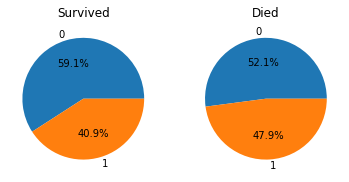

diabetes


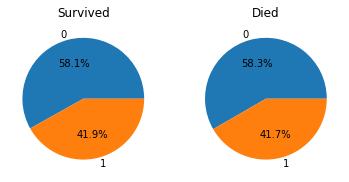

high_blood_pressure


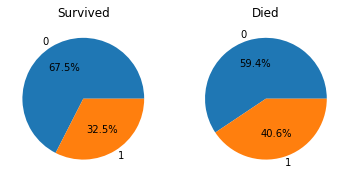

sex


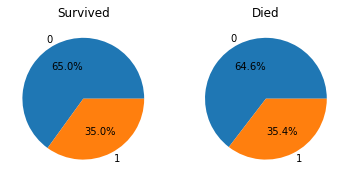

smoking


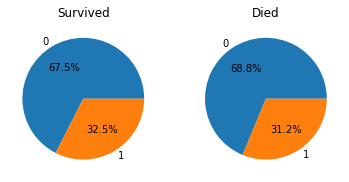

In [43]:
#piechart for binary variable 
#survived and died sections look similar. not a good indicator of whether this person died.
for col in BINARY_COLS:
    f, (ax1, ax2) = plt.subplots(1, 2)
    print(col)
    ax1.pie(heart_data[heart_data[TARGET_COL] == 0][col].value_counts(), labels=[0,1], autopct='%1.1f%%')
    ax1.set_title('Survived')
    ax2.pie(heart_data[heart_data[TARGET_COL] == 1][col].value_counts(), labels=[0,1], autopct='%1.1f%%')
    ax2.set_title('Died')
    plt.show()

Across the board, we see little differences in the target variable due to any of these binary variables alone. Thus, we might expect this classification task be a bit challenging.

In [45]:
# X data is everything but the target column
X_data = heart_data[heart_data.columns[:-1]]
# y data is the target column
y_data = heart_data[TARGET_COL]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
print(f"{len(X_train)} training examples and {len(X_test)} test examples")

239 training examples and 60 test examples


It's also worth noting that the *scale* of the continuous variables vary drastically. Take a look at this:

In [ ]:
print("Max age:", max(X_data['age']))
print("Max platelets:", max(X_data['platelets']))

This is generally not ideal for neural nets. A big difference in scale between different features means that the "larger scale" features will naturally overpower the "smaller scale" ones, and the net will need to learn extremely small / large weights to keep the features comparable. This is unnecessary work for the neural net when we can just **normalize** our input first.

There's a few different ways to normalize data, but the goal is to scale each features so they're comparable. We can use the [standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to perform standard normalization, which means transforming the data so that the mean and standard deviation of each feature is 0 and 1, respectively.

In [47]:
def normalify(data, columns, scaler=None):
    ''' Apply normalization to the specified columns in data. Fits a scaler if one is not given '''
    # Get columns to be normalized
    data_to_normalize = data[columns]
    # Get remaining data (not to be normalized)
    remaining_cols = [c for c in data.columns if c not in columns]
    remaining_data = data[remaining_cols]
    # If no scaler is given, fit one
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(data_to_normalize)
    # Apply standard scaler
    data_normalized = scaler.transform(data_to_normalize)
    # Recombine normalized and remaining data, and also return the scaler
    return np.hstack((data_normalized, remaining_data)), scaler

In [48]:
# Apply our normalization process
X_train_normalized, scaler = normalify(X_train, CONTINUOUS_COLS)
X_test_normalized, _ = normalify(X_test, CONTINUOUS_COLS, scaler=scaler)

In [49]:
# For consistency, we'll also turn our y data into numpy arrays
y_train, y_test = np.array(y_train), np.array(y_test)

Our X data is now a matrix of values that mostly sit between -1 and 1. Cool!

In [50]:
print("X training data:\n", X_train_normalized)
print("Shape:", X_train_normalized.shape)

X training data:
 [[ 2.05372711  5.39964501 -0.26499063 ...  0.          1.
   1.        ]
 [ 0.68846323  0.01310596 -0.26499063 ...  0.          1.
   0.        ]
 [ 0.68846323  0.01310596 -1.5282771  ...  0.          1.
   1.        ]
 ...
 [-0.33548468 -0.46151928 -1.10718161 ...  1.          1.
   0.        ]
 [ 0.34714726 -0.44830701 -0.68608612 ...  1.          0.
   0.        ]
 [-0.50614266  2.26122376 -0.26499063 ...  1.          1.
   0.        ]]
Shape: (239, 12)


And, as expected, our y data are binary 0s (no heart failure) and 1s (heart failure).

In [51]:
print("y training data:\n", y_train)
print("Shape:", y_train.shape)

y training data:
 [1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0]
Shape: (239,)


Let's build a model! We'll incorporate something called `Dropout`, which randomly deactivates (sets to 0) a certain proportion of weights in a layer. This might seem destructive; why do we want to un-learn what we've learned? Dropout is a great way to combat overfitting! 

By deactivating weights, the model is forced to re-learn those connections from the existing weights and in doing so, learns the data more deeply instead of "memorizing" the input-output relationship in the training data. You can think of dropout like working out; your muscles get damaged to grow back stronger.

In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
def defineBaselineModel():
    ''' Define and return a neural net '''
    model = Sequential()
    model.add(Dense(64, input_dim=12))         # Input layer has 12 features; second layer of 64 neurons
    model.add(Dropout(0.3))                    # 30% of weights are deactivated
    model.add(Dense(128))                      # Third layer has 128 neurons
    model.add(Dropout(0.3))
    model.add(Dense(256))                      # Fourth layer has 256 neurons
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # One neuron for output with sigmoid activation
    opt = Adam(learning_rate=0.01)             # Define optimizer
    loss = 'binary_crossentropy'               # Binary crossentropy for loss
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

In [75]:
model = defineBaselineModel()
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                832       
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 128)               8320      
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 256)               33024     
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_59 (Dense)            (None, 1)               

In [82]:
# Train model on data!
model.fit(X_train_normalized, y_train, batch_size=8, epochs=3, validation_split = 0.2)
#it's possible that accuracy (evaluated on train set) can be lower than val_accuracy (evaluated on validation set)

Epoch 1/3
24/24 [==============================] - 0s 18ms/step - loss: 0.8482 - accuracy: 0.5445 - val_loss: 0.6759 - val_accuracy: 0.6667
Epoch 2/3
24/24 [==============================] - 0s 21ms/step - loss: 0.9831 - accuracy: 0.4921 - val_loss: 0.7891 - val_accuracy: 0.5208
Epoch 3/3
24/24 [==============================] - 0s 15ms/step - loss: 0.8818 - accuracy: 0.5026 - val_loss: 0.6377 - val_accuracy: 0.5625


In [56]:
# And evaluate!
acc = model.evaluate(X_test_normalized, y_test)
print("Accuracy:", acc[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.7500
Accuracy: 0.75


The performance will vary every time you train the model, but when I ran it, the test accuracy was 78%. Let's check how well the model would do if it guessed `0` every time.

In [59]:
1 - (sum(y_data) / len(y_data)) #sum(y_data) is the # of occurences of 1 here

0.6789297658862876

So, that's a little bit reassuring; the model performs about 10% better than it would by just guessing that there is never a heart failure. This isn't stellar, but if we preprocessed the data better (e.g. apply a log scale to `creatinine_phosphokinase`), or if we had more data, we could hope for a better performance.

Even though we split our data into training and test data, it's very possible that, by random chance, our test set was "easy" and resulted in a better test accuracy than we would get with a different train-test split. For this reason, we often use **K-fold cross validation** as a way of combating this. Basically, the data gets split up into `k` "folds", and then the model is trained and tested on different combinations of those folds (each fold gets to be the test set once). We can take the average of each test accuracy as a more honest evaluation.

In [71]:
from sklearn.model_selection import KFold

def create_data_splits(data, k=5):
    ''' Returns a list of k tuples (X_train, X_test, y_train, y_test) '''
    splits = []
    kf = KFold(n_splits=k, shuffle=True)
    # Get raw X and y data
    X_data = data[data.columns[:-1]]
    y_data = data[data.columns[-1]]
    # kf.split returns train and test indexes
    for train_indexes, test_indexes in kf.split(X_data):
        # Get actual data by "filtering" by index using pandas' iloc
        X_train, X_test = X_data.iloc[train_indexes], X_data.iloc[test_indexes]
        y_train, y_test = y_data.iloc[train_indexes], y_data.iloc[test_indexes]
        # Apply normalization
        X_train_normalized, scaler = normalify(X_train, CONTINUOUS_COLS)
        X_test_normalized, _ = normalify(X_test, CONTINUOUS_COLS, scaler=scaler)
        y_train, y_test = np.array(y_train), np.array(y_test)
        # Add tuple of data to splits
        splits.append((X_train_normalized, X_test_normalized, y_train, y_test))
    return splits

In [72]:
# Use 10-fold validation
k = 10
splits = create_data_splits(heart_data, k=k)
accuracies = []
for X_train, X_test, y_train, y_test in splits:
    # Important: define a new model every time you train on a new data split!
    model = defineBaselineModel()
    # verbose=0 doesn't show the progress bar
    model.fit(X_train, y_train, batch_size=8, epochs=10, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
# Print average accuracy
print(sum(accuracies) / k)

0.788965517282486


When I ran this code, it resulted in an average accuracy around 80%, which isn't half bad, and substantially better than random guess.

That's all we have time for today! Another great thing to check out would be a confusion matrix, which will let you visualize *how* the model misclassifies. Check out workshop 3 if you'd like a refresher on how to make / interpret those.

## Closing remarks

<img src="working_on_workshop.jpg" width="400px">
<br />
<div width="100%" style="text-align: center">
    Me working on this workshop at midnight; hope you've enjoyed learning about machine learning!
</div>

<img src="working_on_working_on_workshop.jpg" width="400px">
<br />
<div width="100%" style="text-align: center">
    Me working on this workshop in the morning; hope you've enjoyed learning about machine learning!
</div>